In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

norman = pd.read_csv('../../results/norman.csv', index_col=0).assign(Dataset='Norman').drop(['split'], axis=1)
norman = norman[norman.subgroup != 'single']
norman = norman.melt(id_vars=['Method', 'subgroup'], value_vars=['NormMSE', '1-PCC'], 
                                var_name='Metric', value_name='Value')
norman['Method'] = norman['Method'].replace('scOracle', 'Scouter')
norman['Method'] = norman['Method'].replace('Biolord', 'biolord')
norman['Method'] = norman['Method'].replace('Gears', 'GEARS')
norman['Method'] = pd.Categorical(norman['Method'], categories=['Scouter', 'biolord', 'GEARS'], ordered=True)

# Define a custom color palette
custom_palette = {
    'Scouter': '#EFC000FF',
    'biolord': '#0073C2FF',
    'GEARS': '#CD534CFF'
}

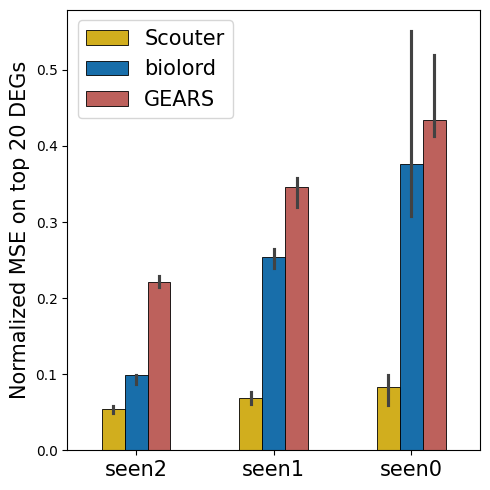

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
subgroup
seen0    0.778916
seen1    0.729534
seen2    0.450381
dtype: float64
The average percentage of improvment of Scouter over biolord: 0.65
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
subgroup
seen0    0.808339
seen1    0.800772
seen2    0.755420
dtype: float64
The average percentage of improvment of Scouter over GEARS: 0.79


In [2]:
NMSE = norman[norman.Metric=='NormMSE']
plt.figure(figsize=(5,5), dpi=100)
barplot = sns.barplot(data=NMSE, x="subgroup", y="Value", hue="Method", width=0.5, 
                      palette=custom_palette, estimator='median', errorbar=("ci", 50))
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.6)
legend = plt.legend(loc='upper left', fontsize=15)
legend.set_title('')
plt.xticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Normalized MSE on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.show()

median_MSE = NMSE.groupby(['subgroup', 'Method'], observed=False)['Value'].median().reset_index()
pivot_MSE = median_MSE.pivot(index='subgroup', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
pert_biolord = (pivot_MSE['biolord'] - pivot_MSE['Scouter'])/pivot_MSE['biolord']
print(pert_biolord)
print(f'The average percentage of improvment of Scouter over biolord: {pert_biolord.mean().round(2)}')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
pert_gears = (pivot_MSE['GEARS'] - pivot_MSE['Scouter'])/pivot_MSE['GEARS']
print(pert_gears)
print(f'The average percentage of improvment of Scouter over GEARS: {pert_gears.mean().round(2)}')

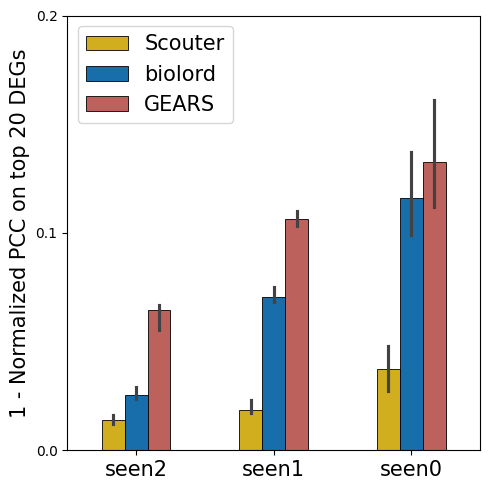

------------------------------------------------------
The percentage of improvment of Scouter over biolord:
subgroup
seen0    0.675386
seen1    0.736166
seen2    0.443763
dtype: float64
The average percentage of improvment of Scouter over biolord: 0.62
------------------------------------------------------
The percentage of improvment of Scouter over GEARS:
subgroup
seen0    0.716412
seen1    0.824644
seen2    0.781395
dtype: float64
The average percentage of improvment of Scouter over GEARS: 0.77


In [3]:
NPCC = norman[norman.Metric=='1-PCC']
plt.figure(figsize=(5,5), dpi=100)
barplot = sns.barplot(data=NPCC, x="subgroup", y="Value", hue="Method", width=0.5, 
                      palette=custom_palette, estimator='median', errorbar=("ci", 50))
for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.6)
legend = plt.legend(loc='upper left', fontsize=15)
legend.set_title('')
plt.xticks(fontsize=15)
plt.xlabel('')
plt.yticks([0.0, 0.1, 0.2])
plt.ylabel('1 - Normalized PCC on top 20 DEGs', fontsize=15)
plt.tight_layout()
plt.show()

median_PCC = NPCC.groupby(['subgroup', 'Method'], observed=False)['Value'].median().reset_index()
pivot_PCC = median_PCC.pivot(index='subgroup', columns='Method', values='Value')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over biolord:')
pert_biolord = (pivot_PCC['biolord'] - pivot_PCC['Scouter'])/pivot_PCC['biolord']
print(pert_biolord)
print(f'The average percentage of improvment of Scouter over biolord: {pert_biolord.mean().round(2)}')
print('------------------------------------------------------')
print('The percentage of improvment of Scouter over GEARS:')
pert_gears = (pivot_PCC['GEARS'] - pivot_PCC['Scouter'])/pivot_PCC['GEARS']
print(pert_gears)
print(f'The average percentage of improvment of Scouter over GEARS: {pert_gears.mean().round(2)}')